In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
housing_df= pd.read_csv("boston.csv")
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#getting a full description of the data 
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#checking full info of the housing data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#target variable is medv which is the prices of the houses
housing_corr= housing_df.corr()
housing_corr.MEDV.sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [6]:
#importing the various tools for machine learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
X= housing_df.drop(columns= 'MEDV', axis=1)
y=housing_df["MEDV"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
#scaling the X train and test set
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [11]:
#initializing the model and training it
model= LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
y_pred_train= model.predict(X_train_scaled)
y_pred_test= model.predict(X_test_scaled)

In [13]:
#reporting metrics
#mean absolute error
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'mae_train={mae_train}')
print(f'mae_test={mae_test}')
print('-'*35)
#mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'mse_train={mse_train}')
print(f'mse_test={mse_test}')
print('-'*35)
#r2
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f'r2_train={r2_train}')
print(f'r2_test={r2_test}')
print('-'*35)

mae_train=3.31477162678323
mae_test=3.1890919658878483
-----------------------------------
mse_train=21.641412753226312
mse_test=24.291119474973517
-----------------------------------
r2_train=0.7508856358979673
r2_test=0.668759493535632
-----------------------------------


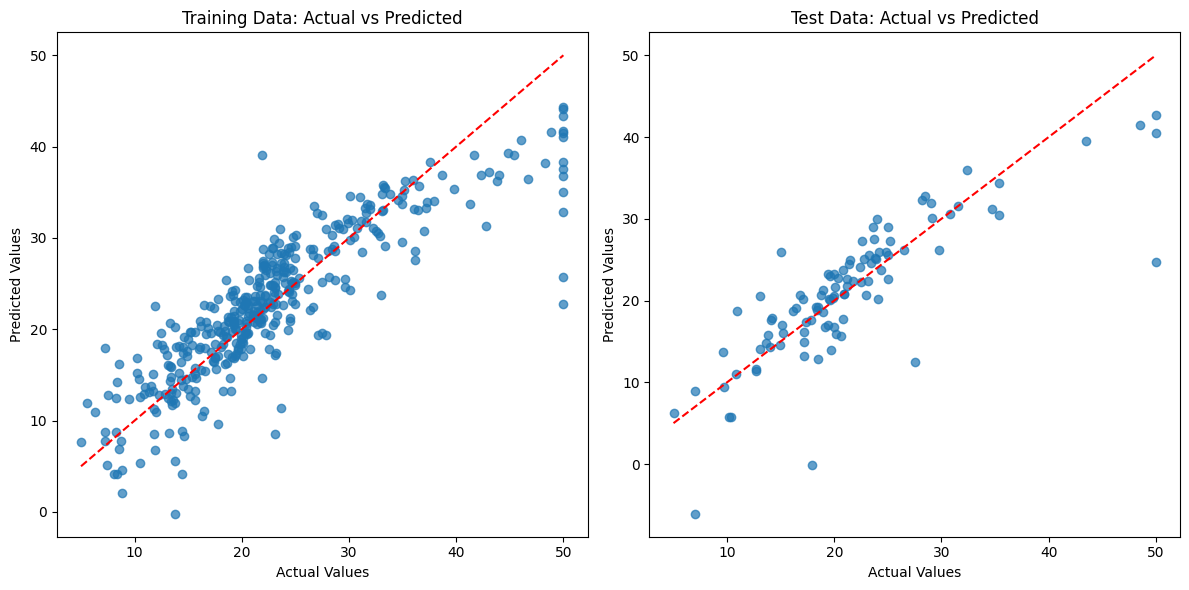

In [14]:
# Scatter plot for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of equality
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of equality
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

#NEW DATA PREDICTION

In [29]:
##Using the first row of the table
##Transforming the data
scaler.transform(X.iloc[[0]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
model.predict(scaler.transform(X.iloc[[0]]))

array([22.79653465])

In [30]:
#PICKLING THE MODEL

In [31]:
import pickle
pickle.dump(model, open('boston_price_model.pkl', 'wb'))

In [34]:
##loading the prediction model as pickle_model
pickle_model= pickle.load(open('boston_price_model.pkl', 'rb'))

In [35]:
##predicting the data
pickle_model.predict(scaler.transform(X.iloc[[0]]))

array([22.79653465])

In [33]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [35]:
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'r2_lasso={r2_lasso}')
print(f'r2_ridge={r2_ridge}')

r2_lasso=0.6501375183238987
r2_ridge=0.6687298368808312


In [36]:
#cross validation for ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-4, 4, 10)}  # Testing values from 0.0001 to 10000
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("Best Ridge Alpha:", ridge_cv.best_params_)
print("Best Ridge MSE:", -ridge_cv.best_score_)

Best Ridge Alpha: {'alpha': 0.0001}
Best Ridge MSE: 23.654435353163635


In [37]:
print("Best Ridge Alpha:", ridge_cv.best_params_)
print("Best Ridge MSE:", -ridge_cv.best_score_)
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
ridge_test_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Test MSE:", ridge_test_mse)
print("Ridge Test R²:", ridge_test_r2)

Best Ridge Alpha: {'alpha': 0.0001}
Best Ridge MSE: 23.654435353163635
Ridge Test MSE: 24.291125268812447
Ridge Test R²: 0.6687594145292222


In [38]:
#doing the same for lasso
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [39]:
print("Best Lasso Alpha:", lasso_cv.best_params_)
print("Best Lasso MSE:", -lasso_cv.best_score_)
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Test MSE:", lasso_test_mse)
print("Lasso Test R²:", lasso_test_r2)

Best Lasso Alpha: {'alpha': 0.0001}
Best Lasso MSE: 23.654763073339446
Lasso Test MSE: 24.2908510775565
Lasso Test R²: 0.6687631534779594
